In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
file_path = r'/Users/zoe/Downloads/MarketplaceStats2015Present_en_202411.xlsx'
sheets = ['Value Traded', 'Volume Traded', 'Number of Trades']

dfs = {}

for sheet in sheets:
    df = pd.read_excel(file_path, sheet_name=sheet, skiprows=2)  
    df.insert(0, 'Sheet Name', sheet)  
    df.fillna(0, inplace=True)  
    dfs[sheet] = df

Value_Traded_all = dfs['Value Traded']
Volume_Traded_all = dfs['Volume Traded']
Number_of_Trades_all = dfs['Number of Trades']

merged_df_all = pd.concat([Value_Traded_all, Volume_Traded_all, Number_of_Trades_all], axis=0)
merged_df_all.reset_index(drop=True, inplace=True)
print(f'New DataFrame shape:{merged_df_all.shape}')
merged_df_all.head()
merged_df_all.to_csv('total.csv')
merged_df_all.head(1)


New DataFrame shape:(3927, 23)


,Sheet Name,Month,Trade Type and Listing Market,All Traded Marketplaces,Toronto Stock Exchange,TSX Venture Exchange,CSE,Liquidnet,MATCH Now,Omega,Nasdaq CXC,Alpha,Instinet,TMX Select,Nasdaq CX2,Lynx,NEO-N,NEO-L,Nasdaq CXD,NEO-D,CSE2,Alpha-X,Alpha-DRK
0,Value Traded,2015-Jan,All Trade All Listing Total,2.189792e+11,1.238476e+11,7.519725e+08,3.574376e+09,647613360.0,1.129483e+10,3.555413e+09,3.615840e+10,2.054865e+10,18369332.05,5.526167e+09,1.293922e+10,116605045.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Graph 2

/var/folders/cl/k3rqryp92l7c0clbp65ph8800000gn/T/ipykernel_70809/4146030290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Value_Traded["Month"] = pd.to_datetime(Value_Traded["Month"], errors='coerce')
/var/folders/cl/k3rqryp92l7c0clbp65ph8800000gn/T/ipykernel_70809/4146030290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Value_Traded['Year'] = pd.to_datetime(Value_Traded['Month']).dt.year


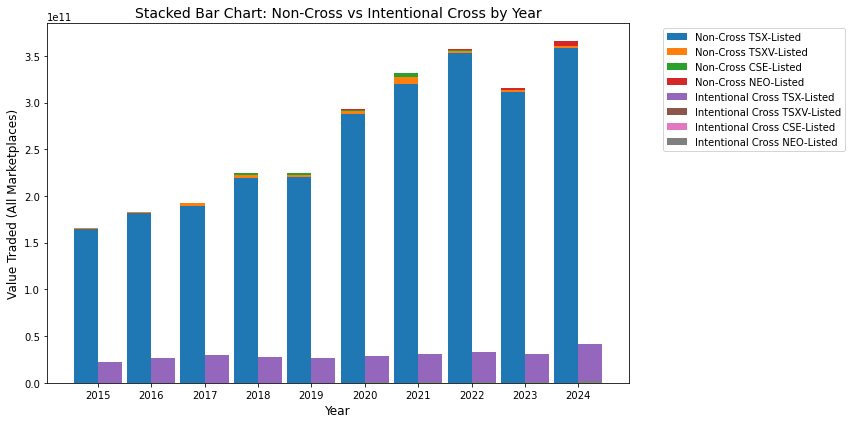

In [26]:
Value_Traded = merged_df_all[merged_df_all['Sheet Name']=='Value Traded']
Value_Traded["Month"] = pd.to_datetime(Value_Traded["Month"], errors='coerce')

Value_Traded = Value_Traded
Value_Traded['Year'] = pd.to_datetime(Value_Traded['Month']).dt.year

Value_Traded = Value_Traded[Value_Traded['Trade Type and Listing Market'].str.contains('Non-Cross|Intentional Cross')]

trade_types = ['Non-Cross', 'Intentional Cross']
exchanges = ['TSX-Listed', 'TSXV-Listed', 'CSE-Listed', 'NEO-Listed']


result = pd.DataFrame()


for trade_type in trade_types:
    for exchange in exchanges:
        mask = Value_Traded['Trade Type and Listing Market'].str.contains(f'{trade_type} {exchange}')
        subset = Value_Traded[mask]
       
        yearly_data = subset.groupby('Year')['All Traded Marketplaces'].mean().reset_index()
        yearly_data.rename(columns={'All Traded Marketplaces': f'{trade_type} {exchange}'}, inplace=True)
        
        if result.empty:
            result = yearly_data
        else:
            result = result.merge(yearly_data, on='Year', how='outer')


non_cross_cols = [col for col in result.columns if 'Non-Cross' in col]
intentional_cross_cols = [col for col in result.columns if 'Intentional Cross' in col]

result['Non-Cross Total'] = result[non_cross_cols].sum(axis=1)
result['Intentional Cross Total'] = result[intentional_cross_cols].sum(axis=1)


years = result['Year']
width = 0.45

fig, ax = plt.subplots(figsize=(12, 6))

bottom = np.zeros(len(years))
for col in non_cross_cols:
    ax.bar(years - width / 2, result[col], width, label=col, bottom=bottom)
    bottom += result[col]

bottom = np.zeros(len(years))
for col in intentional_cross_cols:
    ax.bar(years + width / 2, result[col], width, label=col, bottom=bottom)

ax.set_title('Stacked Bar Chart: Non-Cross vs Intentional Cross by Year', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Value Traded (All Marketplaces)', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(years)
plt.tight_layout()

output_file = 'stacked_bar_chart.png'  
plt.savefig(output_file, dpi=300) 


plt.show()

## Graph 3


/var/folders/cl/k3rqryp92l7c0clbp65ph8800000gn/T/ipykernel_70809/2512802419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Value_Traded['Year'] = pd.to_datetime(Value_Traded['Month']).dt.year
/var/folders/cl/k3rqryp92l7c0clbp65ph8800000gn/T/ipykernel_70809/2512802419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Volume_Traded['Year'] = pd.to_datetime(Volume_Traded['Month']).dt.year
/var/folders/cl/k3rqryp92l7c0clbp65ph8800000gn/T/ipykernel_70809/2512802419.py:9: SettingWithCopyWarning: 
A value i

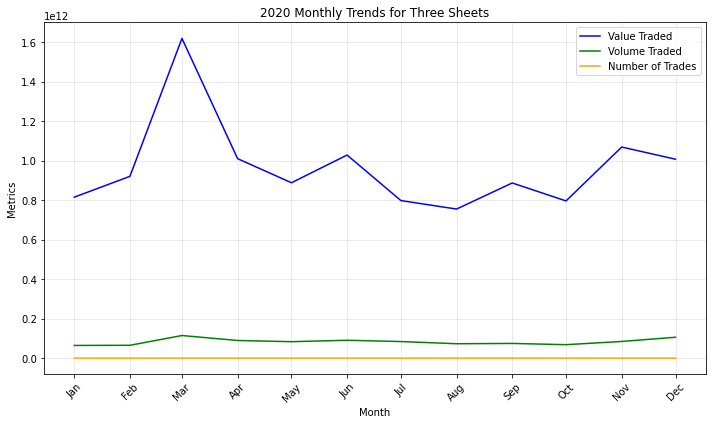

The price increases significantly:
Month
2020-01-01    12.638003
2020-02-01    14.118941
2020-03-01    14.111184
2020-04-01    11.277095
2020-05-01    10.634900
2020-06-01    11.344798
2020-07-01     9.474328
2020-08-01    10.322686
2020-09-01    11.879603
2020-10-01    11.647337
2020-11-01    12.632532
2020-12-01     9.508344
Name: All Traded Marketplaces, dtype: float64


In [30]:

merged_df_all['Year'] = pd.to_datetime(merged_df_all['Month']).dt.year

Value_Traded = merged_df_all[merged_df_all['Sheet Name'] == 'Value Traded']
Volume_Traded = merged_df_all[merged_df_all['Sheet Name'] == 'Volume Traded']
Number_of_Trades = merged_df_all[merged_df_all['Sheet Name'] == 'Number of Trades']

Value_Traded['Year'] = pd.to_datetime(Value_Traded['Month']).dt.year
Volume_Traded['Year'] = pd.to_datetime(Volume_Traded['Month']).dt.year
Number_of_Trades['Year'] = pd.to_datetime(Number_of_Trades['Month']).dt.year

Value_Traded['Month'] = pd.to_datetime(Value_Traded['Month'])
Volume_Traded['Month'] = pd.to_datetime(Volume_Traded['Month'])
Number_of_Trades['Month'] = pd.to_datetime(Number_of_Trades['Month'])


value_traded_2020 = Value_Traded[Value_Traded['Year'] == 2020]
volume_traded_2020 = Volume_Traded[Volume_Traded['Year'] == 2020]
number_of_trades_2020 = Number_of_Trades[Number_of_Trades['Year'] == 2020]


value = value_traded_2020.groupby('Month')['All Traded Marketplaces'].sum().sort_index()
volume = volume_traded_2020.groupby('Month')['All Traded Marketplaces'].sum().sort_index()
number = number_of_trades_2020.groupby('Month')['All Traded Marketplaces'].sum().sort_index()

average_trade_price = value / volume

plt.figure(figsize=(10, 6))
plt.plot(value.index, value, label='Value Traded', color='blue')
plt.plot(volume.index, volume, label='Volume Traded', color='green')
plt.plot(number.index, number, label='Number of Trades', color='orange')

plt.title('2020 Monthly Trends for Three Sheets')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.legend()
plt.grid(alpha=0.3)

plt.xticks(value.index, value.index.strftime('%b'), rotation=45)

plt.tight_layout()
plt.savefig('2020_Monthly_Trends.png', dpi=300)
plt.show()

print(f'The price increases significantly:\n{average_trade_price}')



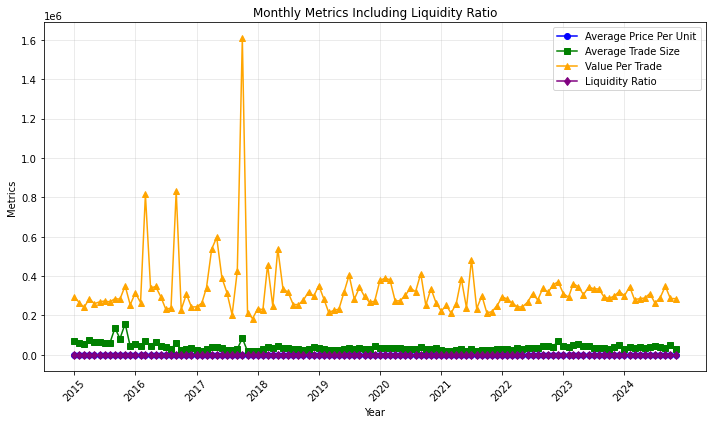

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

merged = pd.merge(Value_Traded, Volume_Traded, on=['Month', 'Trade Type and Listing Market'], suffixes=('_value', '_volume'))
merged = pd.merge(merged, Number_of_Trades, on=['Month', 'Trade Type and Listing Market'])
merged.rename(columns={'All Traded Marketplaces': 'Number of Trades'}, inplace=True)

merged['Average Price Per Unit'] = merged['All Traded Marketplaces_value'] / merged['All Traded Marketplaces_volume']
merged['Average Trade Size'] = merged['All Traded Marketplaces_volume'] / merged['Number of Trades']
merged['Value Per Trade'] = merged['All Traded Marketplaces_value'] / merged['Number of Trades']
merged['Liquidity Ratio'] =  merged['All Traded Marketplaces_value']/merged['All Traded Marketplaces_volume']

monthly_metrics = merged.groupby('Month')[
    ['Average Price Per Unit', 'Average Trade Size', 'Value Per Trade', 'Liquidity Ratio']].mean()


monthly_metrics.index = pd.to_datetime(monthly_metrics.index, format='%Y-%b')
monthly_metrics = monthly_metrics.sort_index()

yearly_ticks = monthly_metrics.index[monthly_metrics.index.month == 1]

plt.figure(figsize=(10, 6))
plt.plot(monthly_metrics.index, monthly_metrics['Average Price Per Unit'], label='Average Price Per Unit', color='blue', marker='o')
plt.plot(monthly_metrics.index, monthly_metrics['Average Trade Size'], label='Average Trade Size', color='green', marker='s')
plt.plot(monthly_metrics.index, monthly_metrics['Value Per Trade'], label='Value Per Trade', color='orange', marker='^')
plt.plot(monthly_metrics.index, monthly_metrics['Liquidity Ratio'], label='Liquidity Ratio', color='purple', marker='d')

plt.title('Monthly Metrics Including Liquidity Ratio')
plt.xlabel('Year')
plt.ylabel('Metrics')
plt.legend()
plt.grid(alpha=0.3)

plt.xticks(yearly_ticks, yearly_ticks.strftime('%Y'), rotation=45)

plt.tight_layout()
plt.savefig('Monthly_Metrics_With_Liquidity.png', dpi=300)
plt.show()


## Graph 1

In [20]:

columns_to_keep = ['Month', 'Trade Type and Listing Market', 'Toronto Stock Exchange', 'Nasdaq CX2']

Value_Traded_all = Value_Traded_all[Value_Traded_all['Trade Type and Listing Market'] == 'All Trade All Listing Total']
total_value_traded = Value_Traded_all.groupby('Sheet Name').sum()
print(f'The largest two Value_Traded exchanges are Toronto Stock Exchange and Nasdaq CXD.')

columns_to_sum = Value_Traded_all.columns.difference(columns_to_keep + ['All Traded Marketplaces', 'Sheet Name'])
Value_Traded_all['other'] = Value_Traded_all[columns_to_sum].sum(axis=1)
Value_Traded_new = Value_Traded_all[columns_to_keep + ['other']]

columns_to_keep = ['Month', 'Trade Type and Listing Market', 'Toronto Stock Exchange', 'TSX Venture Exchange']

Volume_Traded_all = Volume_Traded_all[Volume_Traded_all['Trade Type and Listing Market'] == 'All Trade All Listing Total']
total_Volumed = Volume_Traded_all.groupby('Sheet Name').sum()
print(f'The largest two Volume_Traded exchanges are Toronto Stock Exchange and TSX Venture Exchange.')

columns_to_sum = Volume_Traded_all.columns.difference(columns_to_keep + ['All Traded Marketplaces', 'Sheet Name'])
Volume_Traded_all['other'] = Volume_Traded_all[columns_to_sum].sum(axis=1)
Volume_Traded_new = Volume_Traded_all[columns_to_keep + ['other']]

columns_to_keep = ['Month', 'Trade Type and Listing Market', 'Toronto Stock Exchange', 'Nasdaq CXC']

Number_of_Trades_all = Number_of_Trades_all[Number_of_Trades_all['Trade Type and Listing Market'] == 'All Trade All Listing Total']
total_Number = Number_of_Trades_all.groupby('Sheet Name').sum()
print(f'The largest two Number_of_Trades exchanges are Toronto Stock Exchange and Nasdaq CXC.')

columns_to_sum = Number_of_Trades_all.columns.difference(columns_to_keep + ['All Traded Marketplaces', 'Sheet Name'])
Number_of_Trades_all['other'] = Number_of_Trades_all[columns_to_sum].sum(axis=1)
Number_of_Trades_new = Number_of_Trades_all[columns_to_keep + ['other']]


The largest two Value_Traded exchanges are Toronto Stock Exchange and Nasdaq CXD.
The largest two Volume_Traded exchanges are Toronto Stock Exchange and TSX Venture Exchange.
The largest two Number_of_Trades exchanges are Toronto Stock Exchange and Nasdaq CXC.


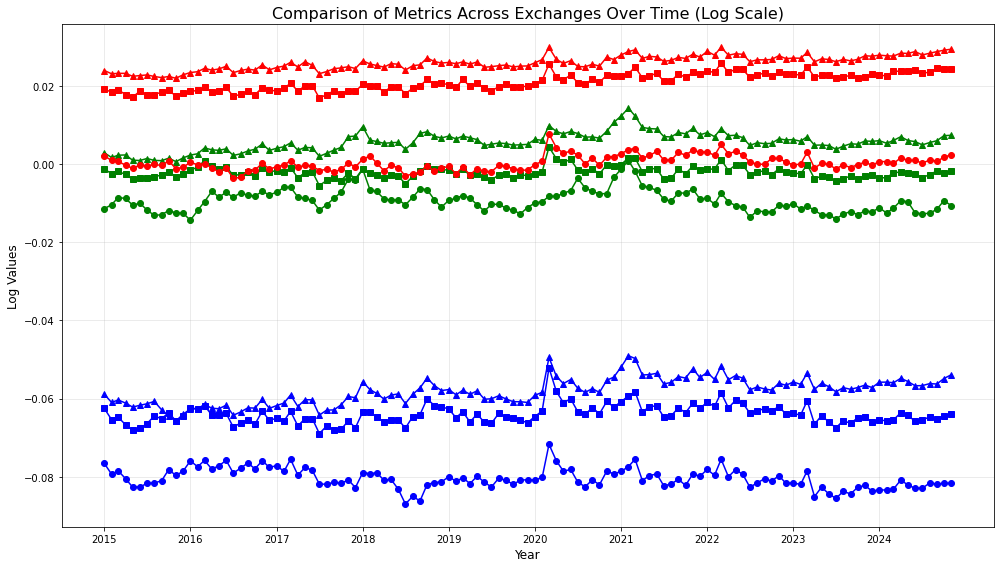

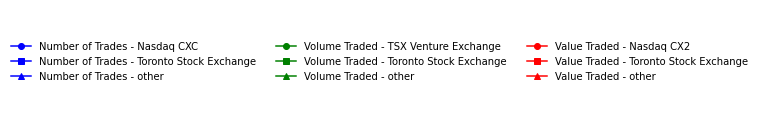

In [31]:
dfs = [Number_of_Trades_new, Volume_Traded_new, Value_Traded_new]
for df in dfs:
    df["Month"] = pd.to_datetime(df["Month"], errors='coerce')  


sheets = ["Number of Trades", "Volume Traded", "Value Traded"]
base_colors = ['blue', 'green', 'red']  
markers = ['o', 's', '^', 'x', 'd']   

plt.figure(figsize=(14, 8))

for df, sheet, base_color in zip(dfs, sheets, base_colors):
    exchange_columns = df.columns.difference(['Sheet Name', 'Month', 'Trade Type and Listing Market', 'All Traded Marketplaces'])
    
    for i, exchange in enumerate(exchange_columns):
        df[exchange] = np.log10(df[exchange].replace(0, np.nan)).fillna(0)  

        label = f"{sheet} - {exchange}"
        plt.plot(df["Month"], df[exchange], label=label, marker=markers[i % len(markers)], color=base_color)

plt.gca().set_xticks(df["Month"].iloc[::12])  
plt.gca().set_xticklabels(df["Month"].iloc[::12].dt.strftime('%Y'))  

plt.title("Comparison of Metrics Across Exchanges Over Time (Log Scale)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Log Values", fontsize=12)


handles, labels = plt.gca().get_legend_handles_labels()


plt.legend().remove()

plt.grid(alpha=0.3)
plt.tight_layout()

#plt.savefig("main_plot_without_legend.png")


fig_legend = plt.figure(figsize=(10, 2)) 
plt.legend(handles, labels, loc='center', fontsize=10, ncol=3, frameon=False)  
plt.axis('off')  
#plt.savefig("legend_only.png")

# Show the main plot
plt.show()
